In [1]:
import matplotlib.pyplot as plt
import numpy as np

def histogram(title,scores):
    # An "interface" to matplotlib.axes.Axes.hist() method
    #scores_sorted = sort(scores)
    #n, bins, patches = plt.hist(x=scores, bins=20, color='#0504aa',
     #                           alpha=0.7, rwidth=0.85)
        
    hist, bins, _ = plt.hist(x=scores, bins=20)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.subplot(212)
    n, bins, patches = plt.hist(x=scores, bins=logbins)
    plt.xscale('log')
    #plt.show()
    
    plt.grid(axis='y', alpha=0.75)
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Movies')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    #plt.ylim(ymax=20)
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

## Update Movie lists

Pasos:

1. Actualizar listas MubiCL y NetflixCL
2. Generar archivo de lists `lists.txt` y subir a [repo github](https://github.com/rilianx/Documents/upload/main)
3. Quitar y volver a cargar extensión (chrome://extensions/) en todos pcs que usen la extensión.

### Actualizar listas MubiCL y NetflixCL

Usando la api de JustWatch, obtenemos todas las películas en Mubi CL (ids en tmdb)

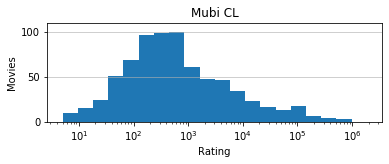

In [3]:
from justwatch import JustWatch

just_watch = JustWatch(country='CL')

mlist=set()
scores = []
for i in range(1,66):
    #print(i)
    results_by_providers = just_watch.search_for_item(page=i, content_types=['movie'], providers=['mbi'])#, scoring_filter_types={"imdb:score": {"min_scoring_value":6.0,"max_scoring_value":10.0}})
    flag = False
    for res in results_by_providers["items"]:
        flag = True
        #mlist.append(res["full_path"].split('/')[-1])
        #print(res)
        if "scoring" not in res: continue
        for it in res["scoring"]:
            if it['provider_type'] == 'tmdb:id':
                mlist.add(str(it['value']))
            if it['provider_type'] == 'imdb:votes':
                scores.append(float(it['value']))
    if flag==False: break

#results = just_watch.search_for_item(query='the matrix')
histogram("Mubi CL",scores)


In [4]:
old = set()
f = open("mubi_cl_all.txt", "r")
for x in f:
    old.add(x.strip('\n'))

diff = old.difference(mlist)
new = mlist.difference(old)
print("removals:", len(diff))
print("additions:", len(new))

removals: 88
additions: 61


In [5]:
print('n_movies:', len(mlist))
f = open("mubi_cl_all.txt", "w")
f.write("\n".join(mlist))
f.close()

## changes
f = open("mubi_cl_changes.txt", "w")
f.write("tmdbID,Review\n")
f.write(",\n".join(new))
if len(diff)>0:
    f.write(",\n")
    f.write(",borrar\n".join(diff))
    f.write(",borrar")
f.close()

n_movies: 962


Y los guardamos en un archivo csv minimal:

Netflix CL
--

Hacemos algo similiar para Netflix CL, esta vez debemos dividir la consulta en dos partes ya que son muchas películas.

{'jw_entity_id': 'tm1059448', 'id': 1059448, 'title': 'Celebrity Marriage', 'full_path': '/cl/pelicula/celebrity-marriage', 'full_paths': {'MOVIE_DETAIL_OVERVIEW': '/cl/pelicula/celebrity-marriage'}, 'poster': '/poster/246456547/{profile}', 'poster_blur_hash': 'TbNl_XxDMv~nWExBx:jKWC%#V@Rj', 'object_type': 'movie'}
{'jw_entity_id': 'tm488003', 'id': 488003, 'title': 'All About Love', 'full_path': '/cl/pelicula/all-about-love', 'full_paths': {'MOVIE_DETAIL_OVERVIEW': '/cl/pelicula/all-about-love'}, 'poster': '/poster/141515167/{profile}', 'poster_blur_hash': 'TfHxf$VuIV_LM~i{o[kDoL%Lt6R*', 'object_type': 'movie'}


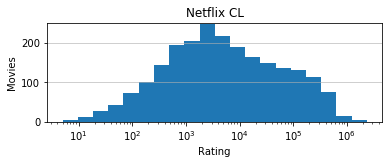

In [7]:
from justwatch import JustWatch
just_watch = JustWatch(country='CL')

mlist=set()
scores=dict()
min_year=2018; max_year=2025;
i=1
while True: 
    results_by_providers = just_watch.search_for_item(page=i, content_types=['movie'], providers=['nfx'], release_year_from=min_year, release_year_until=max_year )
    #scoring_filter_types={"imdb:score": {"min_scoring_value":min_score,"max_scoring_value":max_score}})
    flag = False
    for res in results_by_providers["items"]:
        flag = True
        #mlist.append(res["full_path"].split('/')[-1])
        if "scoring" not in res: continue
            
        for it in res["scoring"]:
            if it['provider_type'] == 'tmdb:id':
                id=str(it['value'])
                mlist.add(str(it['value']))
            if it['provider_type'] == 'imdb:votes':
                scores[id]=float(it['value'])
    
    if flag==False:
        if min_year==2018: 
            min_year=2005; max_year=2017; i=0;
        elif min_year==2005: 
            min_year=1800; max_year=2004; i=0;
        else: break
    i+=1
histogram("Netflix CL", list(scores.values()))

In [8]:
old = set()
f = open("netflix_cl_all.txt", "r")
for x in f:
    if x[0]!='t':
        old.add(x.strip('\n'))

diff = old.difference(mlist)
new = mlist.difference(old)
print("removals:", len(diff))
print("additions:", len(new))

removals: 103
additions: 82


In [9]:
print('n_movies:', len(mlist))
f = open("netflix_cl_all.txt", "w")
f.write("\n".join(mlist))
f.close()

## changes
f = open("netflix_cl_changes.txt", "w")
f.write("tmdbID,Review\n")
f.write(",\n".join(new))
if len(diff)>0:
    f.write(",\n")
    f.write(",borrar\n".join(diff))
    f.write(",borrar")
f.close()

n_movies: 3027


## HBO

2018
2005


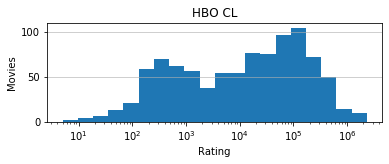

In [19]:
from justwatch import JustWatch
just_watch = JustWatch(country='CL')

mlist=set()
scores=dict()
min_year=2018; max_year=2025;
i=1
while True: 
    results_by_providers = just_watch.search_for_item(page=i, content_types=['movie'], providers=['hbm'], release_year_from=min_year, release_year_until=max_year )
    #scoring_filter_types={"imdb:score": {"min_scoring_value":min_score,"max_scoring_value":max_score}})
    flag = False
    for res in results_by_providers["items"]:
        flag = True
        #mlist.append(res["full_path"].split('/')[-1])
        if "scoring" not in res: continue
            
        for it in res["scoring"]:
            if it['provider_type'] == 'tmdb:id':
                id=str(it['value'])
                mlist.add(str(it['value']))
            if it['provider_type'] == 'imdb:votes':
                scores[id]=float(it['value'])
    
    if flag==False:
        if min_year==2018: 
            print(min_year)
            min_year=2005; max_year=2017; i=0;
        elif min_year==2005: 
            print(min_year)
            min_year=1800; max_year=2004; i=0;
        else: break
    i+=1
histogram("HBO CL", list(scores.values()))

In [20]:
len(scores.values())

944

In [23]:
old = set()
f = open("hbo_cl_all.txt", "r")
for x in f:
    if x[0]!='t':
        old.add(x.strip('\n'))

diff = old.difference(mlist)
new = mlist.difference(old)
print("removals:", len(diff))
print("additions:", len(new))

removals: 0
additions: 0


In [24]:
print('n_movies:', len(mlist))
f = open("hbo_cl_all.txt", "w")
f.write("\n".join(mlist))
f.close()

## changes
f = open("hbo_cl_changes.txt", "w")
f.write("tmdbID,Review\n")
f.write(",\n".join(new))
if len(diff)>0:
    f.write(",\n")
    f.write(",borrar\n".join(diff))
    f.write(",borrar")
f.close()

n_movies: 1277


Ahora se deben actualizar/importar las listas desde [letterboxd](https://letterboxd.com/iaraya/lists/)

### Generar archivo `lists.txt`

Primero abrimos el archivo y cargamos las listas en un mapa:

In [1]:
list_dict = {}
f = open("lists.txt", "r")
for x in f:
    x=x.split(',')
    list_dict[x[0]] = x[1:-1]
f.close()

Usando el siguiente programa se actualizan listas del mapa `list_dict`

In [47]:
import sys
import time
import requests
from bs4 import BeautifulSoup

#todas las listas (carga inicial)
lists=[["blubert","iaraya/list/blubert"],["mao","iaraya/list/mao"],["zhongguo","iaraya/list/zhongguo"],["dell","iaraya/list/dell"],
       ["verbatim","iaraya/list/verbatim"],["butterfly","iaraya/list/butterfly"],["wd1gb","iaraya/list/wd1gb"],
       ["kofa","hotsake/list/korean-classic-film-youtube-channel"],["ondamedia","alfadk/list/ondamedia"],
       ["ondamedia","alfadk/list/ondamedia"],["netflix-cl","iaraya/list/netflix-cl/"],["mubi-cl","iaraya/list/mubi-cl/"],
       ["WL-I","iaraya/watchlist/"],["WL-M","maspid/watchlist/"],["dvds","iaraya/list/dvds"],["seagate2","iaraya/list/seagate2"]]

#listas a actualizar
#lists=[["netflix-cl","iaraya/list/netflix-cl/"],["ondamedia","alfadk/list/ondamedia"],["WL-I","iaraya/watchlist/"],["WL-M","maspid/watchlist/"]]
#lists=[["mubi-cl","iaraya/list/mubi-cl/"]]
#lists=[["netflix-cl","iaraya/list/netflix-cl/"],["seagate2","iaraya/list/seagate2"],["mubi-cl","iaraya/list/mubi-cl/"],["WL-I","iaraya/watchlist/"],["WL-M","maspid/watchlist/"]]
#lists=[["seagate2","iaraya/list/seagate2"],["ondamedia","alfadk/list/ondamedia"]]
#lists=[["mao","iaraya/list/mao"]]
#lists=[["f-director","michaelhaneke/list/films-directed-by-women"]]
#lists=[["mubi-cl","iaraya/list/mubi-cl/"],["netflix-cl","iaraya/list/netflix-cl/"],["seagate2","iaraya/list/seagate2"],["ondamedia","alfadk/list/ondamedia"]]
lists=[["netflix-cl","iaraya/list/netflix-cl/detail/"]]

# list_dict = {} # para carga inicial

for l in lists:  
    mlist = []
    page = 1; validpage = True
    while validpage:
        webpage = requests.get("https://letterboxd.com/"+l[1]+"/page/"+str(page)+"/")
        soup = BeautifulSoup(webpage.content, 'html.parser')
        validpage = False
        for span in soup.find_all('div', class_="really-lazy-load"):
            div = span.find_next_sibling('div')
            body = div.findChildren('div', class_="body-text")
            if len(body) != 0 and 'borrar' in body[0].text: 
                continue
            validpage = True
            mlist.append(span['data-target-link'].split('/')[-2])
        time.sleep(1)
        page += 1
    list_dict[l[0]] = mlist 

Finalmente volvemos a guardar el mapa de listas actualizado:

In [48]:
len(list_dict["netflix-cl"])

2841

In [49]:
f = open("lists.txt", "w")
first = True
for key in list_dict:
    if first==False: f.write('\n')
    first=False
    f.write(key+","+','.join(list_dict[key]))
f.close()

Luego se sube al archivo al [repo github](https://github.com/rilianx/Documents).

In [50]:
import github
g = github.Github(login_or_token="bb8da8e96a783bef62452d86fa29acf5d4ae1f07")

repo = g.get_user().get_repo("Documents")

file = repo.get_contents("/lists.txt")

f = open("lists.txt", "r")
repo.update_file("lists.txt", "updates lists", f.read(), file.sha)

{'commit': Commit(sha="8894f8b9fb0cbe35adeb8a713e8a8e620aca716e"),
 'content': ContentFile(path="lists.txt")}

Amazon Prime CL
--

Hacemos algo similiar para Netflix CL, esta vez debemos dividir la consulta en dos partes ya que son muchas películas.

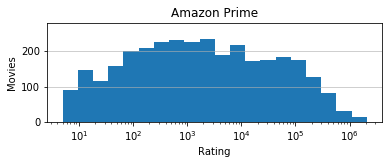

In [143]:
from justwatch import JustWatch
just_watch = JustWatch(country='CL')

mlist=set()
scores=[]
min_year=2018; max_year=2025;
i=1
while True: 
    results_by_providers = just_watch.search_for_item(page=i, content_types=['movie'], providers=['prv'], release_year_from=min_year, release_year_until=max_year )
    #scoring_filter_types={"imdb:score": {"min_scoring_value":min_score,"max_scoring_value":max_score}})
    flag = False
    for res in results_by_providers["items"]:
        flag = True
        #mlist.append(res["full_path"].split('/')[-1])
        for it in res["scoring"]:
            if it['provider_type'] == 'tmdb:id':
                mlist.add(str(it['value']))
            if it['provider_type'] == 'imdb:votes':
                scores.append(float(it['value']))
    
    if flag==False:
        if min_year==2018: 
            min_year=2005; max_year=2017; i=0;
        elif min_year==2005: 
            min_year=1800; max_year=2004; i=0;
        else: break
    i+=1
histogram("Amazon Prime",scores)

In [2]:
print('n_movies:', len(mlist))
f = open("amazonprime_cl_all.txt", "w")
f.write("\n".join(mlist))
f.close()

NameError: name 'mlist' is not defined

In [141]:
len(scores)

3230

In [31]:
import requests
from bs4 import BeautifulSoup
import time 

def load_list(listname):
    mlist = set()
    page = 1; validpage = True
    while validpage:
        webpage = requests.get("https://letterboxd.com/"+listname+"/page/"+str(page)+"/")
        soup = BeautifulSoup(webpage.content, 'html.parser')
        validpage = False
        for span in soup.find_all('div', class_="really-lazy-load"):
            validpage = True
            mlist.add(span['data-target-link'].split('/')[-2])
        time.sleep(1)
        page += 1
    return mlist

In [76]:
netflix = load_list("iaraya/list/netflix-cl")

In [41]:
mubi = load_list("iaraya/list/mubi-cl")

In [155]:
amazon = load_list("iaraya/list/amazon-prime-cl")

In [32]:
hbomax =load_list("iaraya/list/hbo-max-cl")

In [39]:
criterion =load_list("schadenfroh/list/criterion-collection")

In [42]:
len(mubi.intersection(criterion))

61

In [157]:
mexico = load_list("iknow/list/estrenos-mexicanos-1990")

In [159]:
china = load_list("theendofcinema/list/the-chinese-cinema")

In [162]:
criterion = load_list("michaelhutchins/list/the-criterion-channel-limited-engagements")

In [164]:
asian = load_list("shbab/list/best-asian-movies-ive-seen")

In [166]:
indian = load_list("anand12/list/indian-cinema-essentials")

In [168]:
fernanda = load_list("moviescaly/list/peliculas-recomendadas-por-fernanda-solorzano")

In [170]:
saviors = load_list("davidc888/list/the-new-saviors-of-cinema-the-canon-of-new")

In [172]:
directores = load_list("iaraya/list/directores-mas-vistos/")

In [158]:
ls = mexico
print("netflix:",len(netflix.intersection(ls)))
print("mubi:",len(mubi.intersection(ls)))
print("amazon:",len(amazon.intersection(ls)))

netflix: 0
mubi: 0
amazon: 1


In [160]:
ls = china
print("netflix:",len(netflix.intersection(ls)))
print("mubi:",len(mubi.intersection(ls)))
print("amazon:",len(amazon.intersection(ls)))

netflix: 47
mubi: 9
amazon: 9


In [163]:
ls = criterion
print("netflix:",len(netflix.intersection(ls)))
print("mubi:",len(mubi.intersection(ls)))
print("amazon:",len(amazon.intersection(ls)))

netflix: 3
mubi: 19
amazon: 7


In [165]:
ls = asian
print("netflix:",len(netflix.intersection(ls)))
print("mubi:",len(mubi.intersection(ls)))
print("amazon:",len(amazon.intersection(ls)))

netflix: 19
mubi: 18
amazon: 2


In [167]:
ls = indian
print("netflix:",len(netflix.intersection(ls)))
print("mubi:",len(mubi.intersection(ls)))
print("amazon:",len(amazon.intersection(ls)))

netflix: 14
mubi: 21
amazon: 5


In [169]:
ls = fernanda
print("netflix:",len(netflix.intersection(ls)))
print("mubi:",len(mubi.intersection(ls)))
print("amazon:",len(amazon.intersection(ls)))

netflix: 54
mubi: 9
amazon: 29


In [171]:
ls = saviors
print("netflix:",len(netflix.intersection(ls)))
print("mubi:",len(mubi.intersection(ls)))
print("amazon:",len(amazon.intersection(ls)))

netflix: 12
mubi: 15
amazon: 5


In [173]:
ls = directores
print("netflix:",len(netflix.intersection(ls)))
print("mubi:",len(mubi.intersection(ls)))
print("amazon:",len(amazon.intersection(ls)))

netflix: 3
mubi: 5
amazon: 2
